# 03: Effective Medium (EM) theory 1: Inclusion models

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.size']=14
plt.rcParams['font.family']='arial'

<div class="alert alert-block alert-success">
<b>Learning Objectives:</b>
<ul>
    <li>Non-interacting EM model with spherical pores</li>
    <li>Self-Consistent(SC) EM model with spherical pores </li>
    <li>Non-interacting crack model</li>
    <li>Self-consistent crack model</li>
    <li>The assumption and limitation of these models</li>
</ul>
</div>

## Non-interacting EM model with spherical pores
In the previous lecture, we learned different bounds which attempt to define limits of effective elastic moduli without assuming microgeometry of the composite. Inclusion based effective medium models, in contrast, attempt to give direct estimation of elastic moduli given matrix mineralogy, volume fractions and assumption on microgeometry. 

A simple inclusion model is the "Swiss cheese" model where we assume a dilute distribution of spherical inclusions embedded in an * *unbounded* * homogenous solid.  It takes the "noninteracting assumption" in which all cavities (pores) are independent so that their contributions can be added. 

The Swiss cheese model is defined as :

$
\frac{1}{K^{*}}=\frac{1}{K_{s}}\left[1+(1+\frac{3K_s}{4G_s} ) \phi\right]
$

$
\frac{1}{G^{*}}=\frac{1}{G_{s}}\left[1+\frac{15 K_{s}+20 G_{S}}{9 K_{S}+8 G_{S}} \phi\right]
$


In [2]:
def Dilute_incl(Ks,Gs,phi):
    """Compute effective elastic moduli via "Swiss cheese" model with spherical pores. Written by Jiaxin Yu (July 2021)

    Args:
        Ks (GPa): Bulk modulus of matrix 
        Gs (GPa): shear modulus of matrix
        phi (frac): porosity

    Returns:
        Kdry,Gdry (GPa): effective elastic moduli
    """    
    Kdry=(1/Ks *(1+(1+3*Ks/(4*Gs))*phi))**-1
    Gdry=(1/Gs * (1+(15*Ks+20*Gs)*phi/(9*Ks+8*Gs)))**-1
    return Kdry, Gdry


## Self-Consistent(SC) EM model with spherical pores
Rocks generally have their highest elastic moduli and seismic velocities in the limit of zero porosity, approaching the moduli of the mineral constituent. As we learned previously, there is almost always a *critical porosity*, $\phi_c$ at which the rock loses it's coherence and falls apart. The noninteracting models are generally jusitified for very dilute concentration of inclusion and assumes no interaction between inclusions. The estimated average moduli are zero and the prediction fails when the void volume fraction reaches to 0.5. If we want to include the interaction effects to a certain extent and also incorpate the critical porosity behavior, Self-consistent (SC) models can be used. SC models follow the heuristic argument that each inclusion deforms as though it sits in the as-yet-unknown effective medium, rather than in the original uniform background phase. When assuming random distribution of spherical pores, the SC model can be written as: 

$
\frac{1}{K^{*}}=\frac{1}{K_{S}}+\left(\frac{1}{K^{*}}+\frac{3}{4 G^{*}}\right) \phi
$

$
\frac{1}{G^{*}}=\frac{1}{G_{S}}+\frac{15 K^{*}+20 G *}{9 K^{*}+8 G *} \frac{\phi}{G^{*}}
$

It's noted that $K^*$ is sitting at the both sides of the equation. So does $G^*$. Therefore, iterative solver is invoked in SC approach.  $K^*$ and $G^*$ will converge after several iterations.
 

In [3]:
def SC(phi,Ks,Gs,iter_n):
    """
    Self-Consistent(SC) EM model with spherical pores. Written by Jiaxin Yu (July 2021)

    Args:
        phi (float): volumetric fraction
        Ks (GPa): bulk modulus of matrix phase
        Gs (GPa): shear modulus of matrix phase
        
        iter_n (int): iterations, necessary iterations increases as f increases.
    Returns:
        K_eff,G_eff (GPa): effective elastic moduli
    Note: 
        phi.shape== Km.shape
    """  
    K_eff=Ks
    G_eff=Gs
    for i in range(iter_n):
        K_eff = (1/Ks + (1/K_eff+3/(4*G_eff))*phi) **-1
        G_eff= (1/Gs + (15*K_eff+20*G_eff)/(9*K_eff+8*G_eff) *phi/G_eff )**-1
    return K_eff,G_eff

## Non-interacting crack model
The predicted moduli using spherical inclusions are too high compared to experiments on e.g. sandstone, as spherical pores are stiff. The pore geometry in real rock is highly irregular and the pores are more compliant. A simple approach is to include cracks (thin pores) in the EM models. The non-iteracting randomly oriented crack model is defined as : 

$
\frac{1}{K^{*}}=\frac{1}{K_{s}}\left[1+\frac{16}{9} \frac{1-v_{s}^{2}}{1-2 v_{s}} \xi\right] \quad 
$

$
\frac{1}{G^{*}}=\frac{1}{G_{s}}\left[1+\frac{32\left(1-v_{s}\right)\left(5-v_{s}\right)}{45\left(2-v_{s}\right)} \xi\right]
$

where $\xi$ is crack density defined as:

$
\xi=\frac{3\phi_{crack}}{4\pi\alpha}
$, $\phi_{crack}$ is the crack porosity:

$
\phi_c=\frac{4\pi}{3}\alpha \xi
$

**how to derive the crack density?? how to relate it with crack porosity?**

In [4]:
def Dilute_crack(Ks,Gs,cd):
    """Non-interacting crack model. Written by Jiaxin Yu (July 2021)

    Args:
        Ks (GPa): bulk modulus of uncracked medium
        Gs (GPa): shear modulus of uncracked medium
        cd (unitless): crack density
    Returns:
        K_eff,G_eff (GPa): effective elastic moduli
    """  
    nu= (3*Ks - 2*Gs)/(2*(3*Ks + Gs))  
    K_eff = ( 1/Ks * (1+16/9 *(1-nu**2)/(1-2*nu)*cd) )**-1
    G_eff = ( 1/Gs * (1+32*(1-nu)*(5-nu)/ (45*(2-nu)) * cd) )**-1

    return K_eff, G_eff 


## Self-Consistent crack model
O’Connell and Budiansky (1974) presented equations for effective bulk and shear moduli of a cracked medium with randomly oriented dry penny-shaped cracks (in the limiting case when the aspect ratio α goes to 0)

$
K^{*}=K_{s}\left[1-\frac{16}{9} \frac{1-v^{* 2}}{1-2 v^{*}} \xi\right] 
$

$ 
G^{*}=G_{s}\left[1-\frac{32}{45} \frac{\left(1-v^{*}\right)\left(5-v^{*}\right)}{\left(2-v^{*}\right)} \xi\right]
$

and 
$
v^{*} \cong v_{s}\left(1-\frac{16}{9} \xi\right)
$ for practical purpose. 

In [5]:
def SC_crack(Ks,Gs,v_s,den_c):
    """Compute effective elastic moduli via O’Connell and Budiansky (1974)  self-consistent crack model. Written by Jiaxin Yu (July 2021)

    Args:
        Ks (GPa): bulk modulus of uncracked medium 
        Gs (GPa): shear modulus of uncracked medium 
        v_s (GPa): Poisson's ratio of uncracked solid
        den_c (GPa): crack density

    Returns:
        K_dry, G_dry (GPa): effective bulk and shear moduli
    """    
    v_fr=v_s*(1-16*den_c/9)
    K_dry=Ks*(1-16*(1-v_fr**2)*den_c/(9*(1-2*v_fr)))
    G_dry=Gs*(1-32*(1-v_fr)*(5-v_fr)*den_c/(45*(2-v_fr)))
    return K_dry,G_dry

## Impact of fluid
Some inclusion models with cracks will not be Biot-consistent, since the fluid pressure between cracks and pores does not have time to equilibrate during a period of the wave. Dry cavities can be modeled by setting the inclusion moduli to zero. Fluid saturated
cavities are simulated by setting the inclusion shear modulus to zero.

-  For SC approach: Because the cavities are isolated with respect to flow, this approach simulates very
high-frequency saturated rock behavior appropriate to ultrasonic laboratory conditions. At low frequencies, when there is time for wave-induced pore-pressure
increments to flow and equilibrate, it is better to find the effective moduli for dry
cavities and then saturate them with the Gassmann low-frequency relations. This
should not be confused with the tendency to term this approach a low-frequency
theory, for crack dimensions are assumed to be much smaller than a wavelength.  

## Examples
Let's compare between different effective Medium Models for spherical pores

In [6]:
from model import * # import the module

In [51]:
# specify model parameters
phi=np.linspace(0,0.6,100,endpoint=True) # solid volume fraction = 1-phi
K0, G0= 40,30
#Kw, Gw= 2.2,0
# Voigt bound
K_v=(1-phi)*K0
# Hashin-Strikmann bound 
K_UHS,_= HS(1-phi, K0, 0,G0,0, bound='upper')
# Non-interacting 
K_ni,G_ni=Dilute_incl(K0,G0,phi)
# Self-Consistent
iter_n=100
phi_=np.linspace(0,0.5,100,endpoint=True) 
K_SC,G_SC=SC(phi_,K0,G0,iter_n)


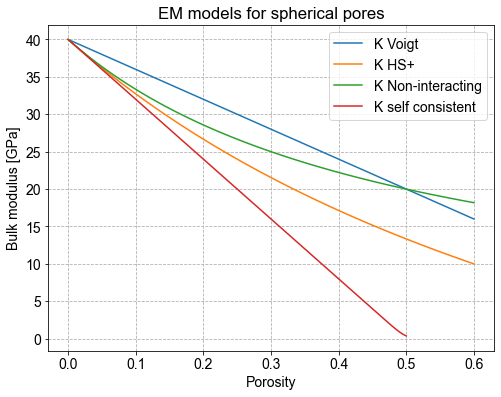

In [52]:
# plot
plt.figure(figsize=(8,6))
plt.xlabel('Porosity')
plt.ylabel('Bulk modulus [GPa]')
plt.title('EM models for spherical pores')
plt.plot(phi, K_v,label='K Voigt')
plt.plot(phi, K_UHS,label='K HS+')
plt.plot(phi, K_ni,label='K Non-interacting')
plt.plot(phi_, K_SC,label='K self consistent')
plt.legend(loc='best')
plt.grid(ls='--')

<div class="alert alert-block alert-info">
<b>Reference:</b> Mavko, G., Mukerji, T. and Dvorkin, J., 2020. The rock physics handbook. Cambridge university press.
</div>

## ToDo
**which model  is not GS consistent?**